# Tratamiento de los datos

El fin de este notebook es hablar sobre el trabajo realizado para completar los datos faltantes y eliminar los outliers dentro del dataset usado. La eliminación de outliers se realizará calculando la media ($\mu$) y borrando todo valor a más de dos deviaciones estándar ($|\frac{x - \mu}{\sigma}| > 2$).

In [1]:
# Cargamos las bibliotecas a usar
import pandas as pd
import numpy as np
import seaborn as sns

## Carga de los datos

### Dataset base propuesto por la cátedra

In [2]:
dataset_base = pd.read_csv('../data/expectativa_de_vida.csv')
del dataset_base['Unnamed: 0']
dataset_base

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status
0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,...,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,Developing
1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,...,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,Developing
2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,...,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,Developing
3,Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,...,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,Developing
4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,...,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,10.7500,...,4.998667,68.5000,0.10000,NaN,NaN,1.65000,1.56250,0.726812,12.78750,Developing
179,Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,36.5000,...,5.977333,91.7500,0.14375,NaN,NaN,14.92500,15.62500,0.627063,11.51250,Developing
180,Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,51.6250,...,5.005333,72.6250,0.10000,NaN,NaN,13.83125,13.75000,0.475500,8.50625,Developing
181,Zambia,53.90625,354.3125,33.4375,2.239333,89.650407,69.818182,6563.8125,17.45000,52.3750,...,5.824000,74.2500,11.93125,811.811841,6.260246e+06,6.88125,6.76250,0.498437,11.21250,Developing


### Accidentes de tránsito

In [3]:
dataset_accidentes = pd.read_csv('../data/road_traffic_death_rate.csv')
# Promedio los períodos
dataset_accidentes = dataset_accidentes.groupby(['Location']).mean()
# Me quedo con las columnas importantes
dataset_accidentes = dataset_accidentes.reset_index()[['Location', 'FactValueNumeric']]
# Renombro las columnas
dataset_accidentes.columns = ['Country', 'Estimated road traffic death rate']
dataset_accidentes

,Country,Estimated road traffic death rate
0,Afghanistan,14.645625
1,Albania,14.352500
2,Algeria,22.130000
3,Angola,24.918750
4,Antigua and Barbuda,5.093750
...,...,...
178,Venezuela (Bolivarian Republic of),32.036875
179,Viet Nam,24.743750
180,Yemen,22.860000
181,Zambia,23.893750


### Tasa de suicidios

In [4]:
dataset_suicidios = pd.read_csv('../data/suicide_rate.csv')
# Promedio los períodos
dataset_suicidios = dataset_suicidios.groupby(['Location']).mean()
# Me quedo con las columnas importantes
dataset_suicidios = dataset_suicidios.reset_index()[['Location', 'FactValueNumeric']]
# Renombro las columnas
dataset_suicidios.columns = ['Country', 'Age-standardized suicide rates']
dataset_suicidios

,Country,Age-standardized suicide rates
0,Afghanistan,7.049375
1,Albania,6.140208
2,Algeria,3.521250
3,Angola,15.771875
4,Antigua and Barbuda,0.796667
...,...,...
178,Venezuela (Bolivarian Republic of),4.313750
179,Viet Nam,7.350208
180,Yemen,7.715833
181,Zambia,21.276250


### Acceso a agua _"segura"_

[Descripción oficial:](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/population-using-safely-managed-drinking-water-services-(-))
> Population drinking water from an improved source that is accessible on premises, available when needed and free from faecal and priority chemical contamination. Improved water sources include piped water, boreholes or tubewells, protected dug wells, protected springs, rainwater, and packaged or delivered water.

In [5]:
dataset_agua = pd.read_csv('../data/drinking-water-averaged.csv')
dataset_agua.columns = ['Region', 'Country', 'Population using safely managed drinking-water services (%)']
dataset_agua

,Region,Country,Population using safely managed drinking-water services (%)
0,Africa,Algeria,73.660000
1,Africa,Angola,NaN
2,Africa,Benin,NaN
3,Africa,Botswana,NaN
4,Africa,Burkina Faso,NaN
...,...,...,...
191,Western Pacific,Solomon Islands,NaN
192,Western Pacific,Tonga,29.358125
193,Western Pacific,Tuvalu,NaN
194,Western Pacific,Vanuatu,NaN


### Acceso a servicios de sanidad _"seguros"_

[Descripción oficial:](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/population-using-safely-managed-sanitation-services-(-))
>Population using an improved sanitation facility that is not shared with other households and where excreta are safely disposed of in situ or treated off site. Improved sanitation facilities include flush/pour flush to piped sewer systems, septic tanks or pit latrines; pit latrines with slabs (including ventilated pit latrines), and composting toilets.

In [6]:
dataset_sanidad = pd.read_csv('../data/sanitation-services-averaged.csv')
dataset_sanidad.columns = ['Region', 'Country', 'Population using safely managed sanitation services (%)']
dataset_sanidad

,Region,Country,Population using safely managed sanitation services (%)
0,Africa,Algeria,20.226250
1,Africa,Angola,NaN
2,Africa,Benin,NaN
3,Africa,Botswana,NaN
4,Africa,Burkina Faso,NaN
...,...,...,...
191,Western Pacific,Solomon Islands,NaN
192,Western Pacific,Tonga,34.761875
193,Western Pacific,Tuvalu,5.577333
194,Western Pacific,Vanuatu,NaN


## Unificar todos los datos

Como los nombres de los países cambian un poco en como están escritos (y no son los mismos países en los datasets más nuevos) en esta parte del notebook normalizamos los nombres y realizamos un inner join dónde descartamos los países que no estaban en el dataset original.

In [7]:
paises_en_los_datos_extra = set(dataset_accidentes['Country']) | set(dataset_suicidios['Country']) | set(dataset_agua['Country']) | set(dataset_sanidad['Country'])
paises_en_los_datos_base = set(dataset_base['Country'])

print('Países que estaban en los datos base y no en los extra:')
print(paises_en_los_datos_extra & (paises_en_los_datos_extra ^ paises_en_los_datos_base))
print('Países que estaban en los datos extra y no en los base:')
print(paises_en_los_datos_base & (paises_en_los_datos_extra ^ paises_en_los_datos_base))

Países que estaban en los datos base y no en los extra:
{'San Marino', 'Saint Kitts and Nevis', 'Occupied Palestinian territory', 'The former Yugoslav Republic of Macedonia', 'Côte d’Ivoire', 'Cook Islands', 'Dominica', 'Palau', 'Nauru', 'Andorra', 'Anguilla', 'Eswatini', 'Niue', 'Tuvalu', 'Marshall Islands', 'Monaco'}
Países que estaban en los datos extra y no en los base:
{"Côte d'Ivoire", 'The former Yugoslav republic of Macedonia', 'Swaziland'}


In [8]:
def acomodar_paises(df):
    # Estos son países que están de una forma en los csv bajados y de otra en el que dió la materia
    # Las traducciones las armamos XOR-eando los sets de países, por ejemplo ejecutando
    # > set(dataset_agua['Country']) ^ set(dataset_base['Country'])
    traducciones = {
        'The former Yugoslav Republic of Macedonia': 'The former Yugoslav republic of Macedonia',
        'Eswatini': 'Swaziland',
        'Côte d’Ivoire': "Côte d'Ivoire",
    }
    # Cambio los nombres que correspondan
    return df.replace(traducciones)

dataset_accidentes = acomodar_paises(dataset_accidentes)
dataset_suicidios = acomodar_paises(dataset_suicidios)
dataset_agua = acomodar_paises(dataset_agua)
dataset_sanidad = acomodar_paises(dataset_sanidad)

dataset = (dataset_base
           .merge(dataset_accidentes, on='Country', validate='one_to_one')
           .merge(dataset_suicidios, on='Country', validate='one_to_one')
           .merge(dataset_agua[['Country', 'Population using safely managed drinking-water services (%)']], on='Country', validate='one_to_one')
           .merge(dataset_sanidad[['Country', 'Population using safely managed sanitation services (%)']], on='Country', validate='one_to_one')
           .merge(dataset_sanidad[['Country', 'Region']], on='Country', validate='one_to_one'))
dataset

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status,Estimated road traffic death rate,Age-standardized suicide rates,Population using safely managed drinking-water services (%),Population using safely managed sanitation services (%),Region
0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,...,16.58125,15.58125,0.415375,8.21250,Developing,14.645625,7.049375,16.724375,NaN,Eastern Mediterranean
1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,...,1.61875,1.70000,0.709875,12.13750,Developing,14.352500,6.140208,58.218125,43.151250,Europe
2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,...,6.09375,5.97500,0.694875,12.71250,Developing,22.130000,3.521250,73.660000,20.226250,Africa
3,Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,...,6.19375,6.66875,0.458375,8.04375,Developing,24.918750,15.771875,NaN,NaN,Africa
4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,...,3.42500,3.37500,0.488625,8.84375,Developing,5.093750,0.796667,NaN,NaN,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,10.7500,...,1.65000,1.56250,0.726812,12.78750,Developing,32.036875,4.313750,NaN,21.393636,Americas
179,Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,36.5000,...,14.92500,15.62500,0.627063,11.51250,Developing,24.743750,7.350208,NaN,NaN,Western Pacific
180,Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,51.6250,...,13.83125,13.75000,0.475500,8.50625,Developing,22.860000,7.715833,NaN,21.715625,Eastern Mediterranean
181,Zambia,53.90625,354.3125,33.4375,2.239333,89.650407,69.818182,6563.8125,17.45000,52.3750,...,6.88125,6.76250,0.498437,11.21250,Developing,23.893750,21.276250,NaN,NaN,Africa


Por si lo queremos usar en otro momento, nos guardamos este dataset _unificado_.

In [9]:
dataset.to_csv('../data/dataset-sin-completar.csv')
!head -1 ../data/dataset-sin-completar.csv | sed 's/,/\n/g'


Country
Life expectancy
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles
BMI
under-five deaths
Polio
Total expenditure
Diphtheria
HIV/AIDS
GDP
Population
thinness  1-19 years
thinness 5-9 years
Income composition of resources
Schooling
Status
Estimated road traffic death rate
Age-standardized suicide rates
Population using safely managed drinking-water services (%)
Population using safely managed sanitation services (%)
Region


## Eliminar outliers

Para eliminar outliers en primera instancia vamos a analizar el reemplazar por `NaN` todo valor que quede por encima de dos desviaciones estándar de la media.

In [10]:
def outlier_mask(df, max_sigma=3):
    normalized_df = (df - df.mean(numeric_only=True)) / df.std(numeric_only=True)
    # No queremos nunca borrar nada de esta columna
    normalized_df['Life expectancy'] = 0
    return normalized_df.abs() > max_sigma

def quitar_outliers(df, max_sigma=3):
    return dataset.mask(outlier_mask(df, max_sigma), np.nan)

dataset_sin_outliers = quitar_outliers(dataset)

print('Cantidad de outliers por columna:')
print(outlier_mask(dataset).sum().loc[lambda x: x != 0].sort_values())

normalized_dataset = (dataset - dataset.mean(numeric_only=True)) / dataset.std(numeric_only=True)
dataset[['Country','HIV/AIDS']][outlier_mask(dataset)['HIV/AIDS'] == True]

Cantidad de outliers por columna:
Hepatitis B                       1
Population                        1
Schooling                         1
Total expenditure                 1
Adult Mortality                   2
Age-standardized suicide rates    2
Polio                             2
infant deaths                     2
thinness  1-19 years              2
under-five deaths                 2
Diphtheria                        3
GDP                               3
thinness 5-9 years                3
Measles                           4
percentage expenditure            4
HIV/AIDS                          6
dtype: int64


,Country,HIV/AIDS
21,Botswana,16.52500
92,Lesotho,22.96875
98,Malawi,16.68125
149,South Africa,18.49375
155,Swaziland,32.94375
182,Zimbabwe,23.26250


### Visualización de los outliers

Para poder visualizar la efectividad del método decidimos hacer un gráfico comparativo de los boxplots de cada variable.

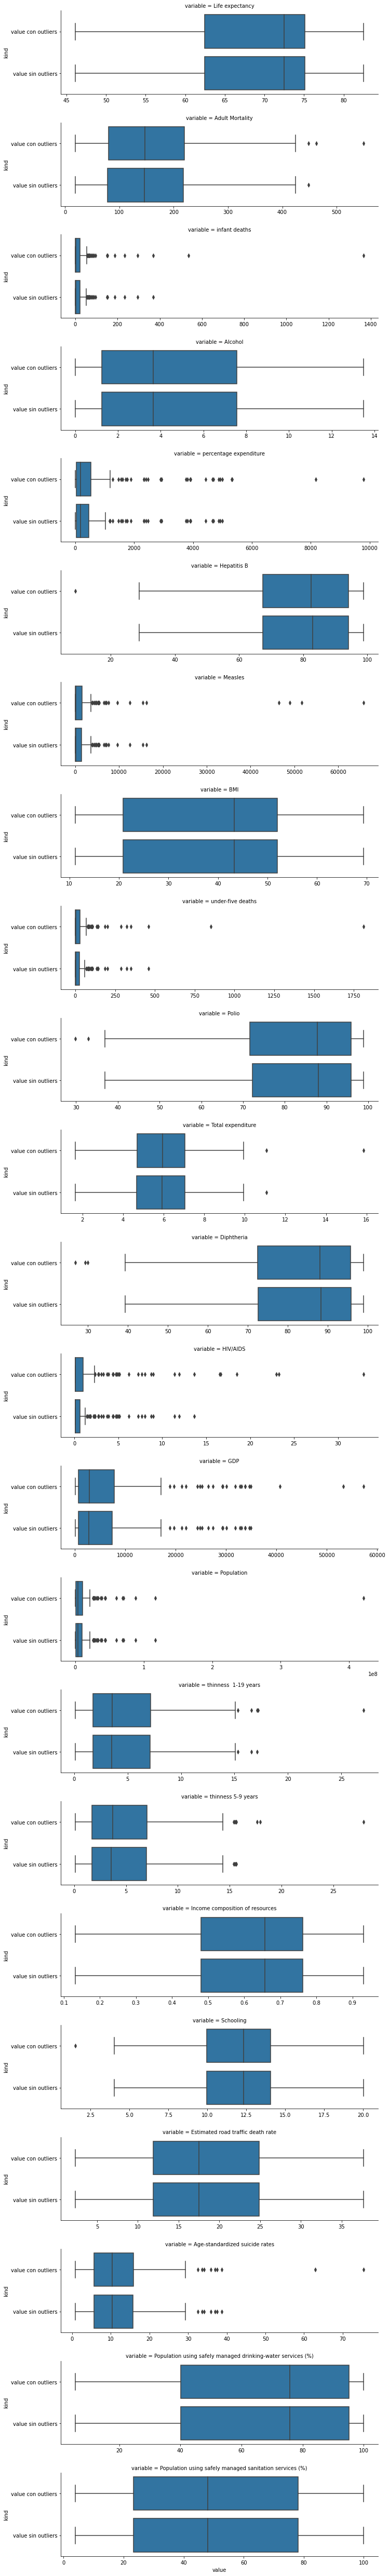

In [11]:
molten_dataset_con_outliers = dataset.melt(id_vars=['Country', 'Region', 'Status'])
molten_dataset_sin_outliers = dataset_sin_outliers.melt(id_vars=['Country', 'Region', 'Status'])
molten_dataset = molten_dataset_con_outliers.merge(molten_dataset_sin_outliers, on=['Country', 'Region', 'Status', 'variable'], suffixes=[' con outliers', ' sin outliers'])
molten_dataset = molten_dataset.melt(id_vars=['Country', 'Region', 'Status', 'variable'], var_name='kind')

g = sns.FacetGrid(molten_dataset, height=3, aspect=3.5, row='variable', sharex=False, sharey=False)
g.map(sns.boxplot, 'value', 'kind', order=['value con outliers', 'value sin outliers'])

Para la mayoría de las variables los cambios fueron muy pequeños. Nos interesa entonces observar el comportamiento de los outliers respecto de la expectativa de vida en las variables más afectadas. ¿Es posible que tengamos que usar otro procedimiento en ellas?

Recordemos entonces cuáles eran las variables más afectadas:

In [12]:
outliers_borrados = outlier_mask(dataset).sum().loc[lambda x: x != 0].sort_values()
variables_interesantes = list(outliers_borrados[outliers_borrados >= 3].keys())
outliers_borrados

Hepatitis B                       1
Population                        1
Schooling                         1
Total expenditure                 1
Adult Mortality                   2
Age-standardized suicide rates    2
Polio                             2
infant deaths                     2
thinness  1-19 years              2
under-five deaths                 2
Diphtheria                        3
GDP                               3
thinness 5-9 years                3
Measles                           4
percentage expenditure            4
HIV/AIDS                          6
dtype: int64

Y grafiquemos los outliers en comparación con la expectativa de vida:

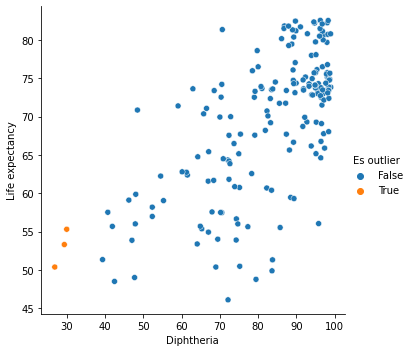

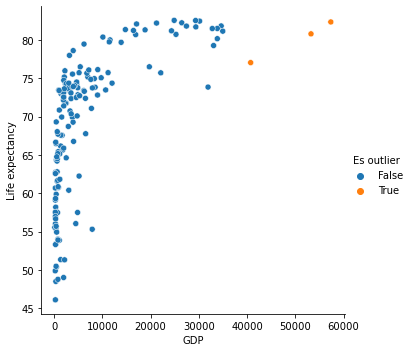

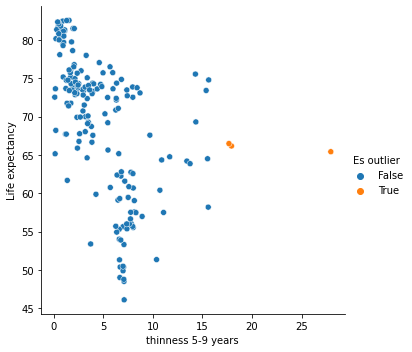

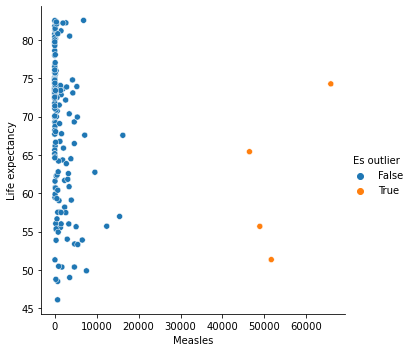

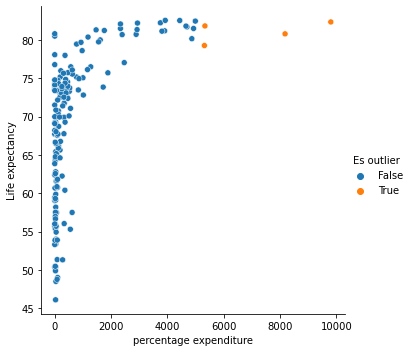

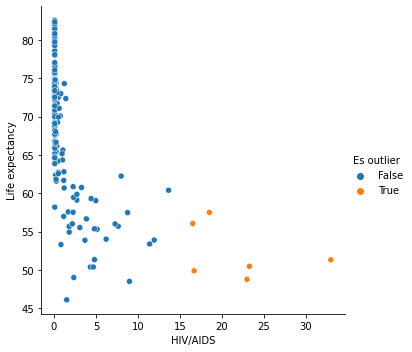

In [13]:
outliers = outlier_mask(dataset)
dataset_outlier_viz = dataset.copy()
for var in variables_interesantes:
    dataset_outlier_viz['Es outlier'] = outliers[var]
    sns.relplot(data=dataset_outlier_viz, x=var, y='Life expectancy', hue='Es outlier')

Con la excepción de los casos de sarampión no parece obvio que los valores detectados sean realmente outliers.

Finalmente, realizamos los histplots de la distribución de cada variable (antes y después de quitar los outliers):

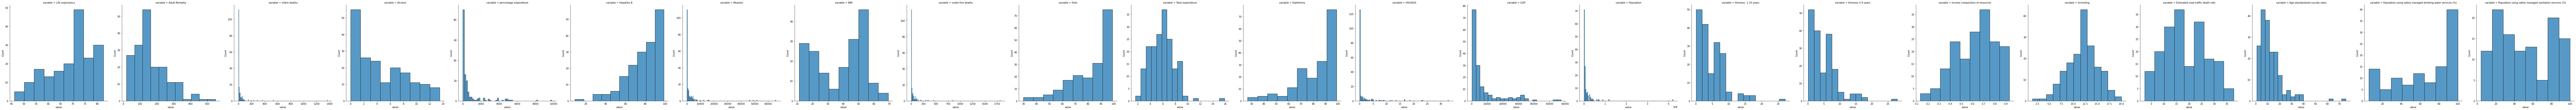

In [14]:
molten_dataset = dataset.melt(id_vars=['Country', 'Region', 'Status'])
g = sns.FacetGrid(molten_dataset, height=6.5, aspect=1, legend_out=False, col='variable', sharex=False, sharey=False)
g.map(sns.histplot, 'value')

In [ ]:
molten_dataset = dataset_sin_outliers.melt(id_vars=['Country', 'Region', 'Status'])
g = sns.FacetGrid(molten_dataset, height=6.5, aspect=1, legend_out=False, col='variable', sharex=False, sharey=False)
g.map(sns.histplot, 'value')

Con lo observado no estamos seguros de que el método de remoción de outliers esté realmente dando frutos. Antes de rechazarlo por completo vamos a considerar variable-a-variable los valores borrados y construir nuestro dataset utilizando el método sólo en aquellas dónde consideramos hace un buen trabajo.

#### Elegir variables dónde el método funciona

In [ ]:
outliers = outlier_mask(dataset)
dataset_outlier_viz = dataset.copy()
for var in outliers.columns:
    # Salteamos la variable si no tiene outliers
    if not outliers[var].any(): continue
    dataset_outlier_viz['Es outlier'] = outliers[var]
    sns.relplot(data=dataset_outlier_viz, x=var, y='Life expectancy', hue='Es outlier')

De aquí entonces vemos que los outliers detectados no parecen tener relación con el resto de los datos en seis de las variables:
- Age-standardized suicide rates
- Measles
- Population
- Total expenditure
- infant deaths
- under-five deaths

En el caso de `Population` es entendible, dado que China e India son países un orden de magnitud más grandes que el resto. Es por esto que decidimos no borrar el outlier encontrado.

In [ ]:
variables_interesantes = ['Age-standardized suicide rates', 'Measles', 'Total expenditure', 'infant deaths', 'under-five deaths']

dataset[variables_interesantes] = dataset_sin_outliers[variables_interesantes]

## Completar datos

Para completar los datos vamos a tomar el promedio por región y reemplazar los `NaN` por el valor que corresponda según la región del país.

Primero que todo calculamos los promedios por región:

In [ ]:
#mean_by_region = dataset.groupby('Region').median()
mean_by_region = dataset.groupby('Region').mean()
mean_by_region

Con las medias por región podemos proceder a armar una máscara y reemplazar los `NaN` dónde sea necesario.

In [ ]:
nan_mask = dataset.isna()
region_means_by_country = mean_by_region.loc[dataset['Region']].reset_index()
dataset_completado = dataset.mask(nan_mask, region_means_by_country)
dataset_completado

Y finalmente guardamos los resultados para uso futuro.

In [ ]:
dataset_completado.to_csv('../data/dataset-completado.csv')